# Question No 2

## Solve the following matrix using simultaneous equations in Python.



x + y + z = 6

2y + 5z = -4

2x + 5y -z = 27

In [71]:
## To solve the simultaneous equations for the given 3 equations, I prefer to go with the following approach.

## Step 01- Derive matrix from the equations

## |  1   1   1   |   x  |    6
## |  0   2   5   |   y  | =  -4
## |  2   5   -1  |   z  |    27


## Step 02- Using the required library/ies. Here "numpy"

## Step 03- identify/define the coefficient and result

## Step 04- Linear Algebra function to solve the given problem:

import numpy as np
coef = np.array([[1, 1, 1], [0, 2, 5], [2, 5, -1]])
result = np.array([6, -4, 27])
solution = np.linalg.solve(coef, result)
print(solution)




[ 5.  3. -2.]


## Alternate approach:

In [72]:
import numpy as np
coef_a = [[1, 1, 1], [0, 2, 5], [2, 5, -1]]
result_a = [6, -4, 27]

solution_a = np.linalg.inv(coef_a).dot(result_a)
print(solution_a)

[ 5.  3. -2.]


...









# Question No 3
## Find the intercept, coefficient value and error term for this regression problem in Python. How would you convey (interpret) these results in a business context?

N.B.: Question calls out that the dataset size is 31 but I observed the size to be 30. Not sure if I got the right file.





...

In [73]:
# The data set consists of exactly 2 input parameters; "YearsExperience" and "Salary", which can be derived as X and Y. Due to the simple representation of Linear relation the values are directly proportonate to each other. As X increases or decreases, Y follows the same pattern.

# The derived formula would be : Y = w0 + w1(x); for the Intercept and Coefficient represented in the form of "w0" and "w1" and input "x"

import numpy as np
import pandas as pd
import matplotlib.pyplot as pypl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

ctcdataset = pd.read_csv('C:/Users/niranjans3ln/01 BITS Pilani/Assignments/Regression/Salary_Data.csv')
ctcdataset.head(2)



YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0

In [74]:
ctcdataset.shape


(30, 2)

In [75]:
ctcdataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [76]:
ctcdataset.info

<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [77]:
ctcdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [78]:
x = ctcdataset.iloc[:, :-1].values
y = ctcdataset.iloc[:, 1].values

print(' X :', x)
print(' Y :', y)

 X : [[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
 Y : [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [79]:
x = ctcdataset[['YearsExperience']]
y = ctcdataset[['Salary']]

print(' X :', x)
print(' Y :', y)

 X :     YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5
 Y :       Salary
0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
5    56642.0
6    60150.0
7    54445.0
8    64445.0
9    57189.0
10   63218.0
11   55794.0
12   56957.0
13   57081.0
14   61111.0
15   67938.0
16   66029.0
17   83088.0
18   81363.0
19   93940.0
20   91738.0
21   98273.0
22  101302.0
23  113812.0
24  109431.0
25  105582.0
26  116969.0
27  11

In [80]:
target_model = LinearRegression().fit(x, y)

In [81]:
print("Model: ", target_model)

Model:  LinearRegression()


In [82]:
print("Model > Intercept: ", target_model.intercept_)

Model > Intercept:  [25792.20019867]


In [83]:
print("Model > Coefficient: ", target_model.coef_)

Model > Coefficient:  [[9449.96232146]]


In [84]:
results = target_model.predict(x)

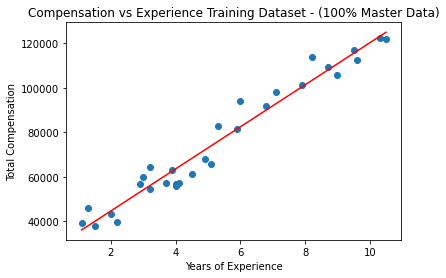

In [85]:
# Using the entire Dataset for Training and building the Model out of it. This is to achieve the best possible accuracy.

# print(pypl.scatter(x, y))
# print(pypl.plot(x, results, color='red'))
pypl.title('Compensation vs Experience Training Dataset - (100% Master Data)')
pypl.xlabel('Years of Experience')
pypl.ylabel('Total Compensation')
pypl.scatter(x, y)
pypl.plot(x, results, color='red')
pypl.show()

Mean Squared Error (MSE) = numpy.sum((result -y) ** 2)

Root Mean Square Error (RMSE) : numpy.sqrt(MSE / Training Data)

RMSE = numpy.sqrt(MSE / n), where n = 30 records




In [86]:
rmse = np.sqrt(mean_squared_error(y, results))

print("Error Term: RMSE: ", rmse)

Error Term: RMSE:  5592.043608760662


In [87]:
r2 = r2_score(y, results)

Coefficient of Determination Formula:
(R)^2 = 1 - (RSS / TSS)

R^2	=	coefficient of determination
RSS	=	sum of squares of residuals
TSS	=	total sum of squares

-----------------------------------------------------
According to Britannica:

The coefficient of determination can also be found with the following formula: R2 = MSS/TSS = (TSS − RSS)/TSS, where MSS is the model sum of squares (also known as ESS, or explained sum of squares), which is the sum of the squares of the prediction from the linear regression minus the mean for that variable; TSS is the total sum of squares associated with the outcome variable, which is the sum of the squares of the measurements minus their mean; and RSS is the residual sum of squares, which is the sum of the squares of the measurements minus the prediction from the linear regression.



In [88]:
print('Coefficient of determination is ', r2)

Coefficient of determination is  0.9569566641435086


Busines Context:

The Compensation distribution by Years of Experience is captured in the Master Dataset which we can derive as follows...

Y = Compensation or Total Compensation
X = Years of Experience

Y = W0 + W1(X)
        W0 = INTERCEPT
        W1 = COEFFICIENT
        X  = FEATURE (Years of Experience)
        Y  = TARGET VARIABLE (Compensation)

The Dataset depict variable linear relation : X -Y




In [89]:
# END OF FIRST METHOD

In [90]:
# SECOND METHOD BEGINS

# Splitting Training Dataset and Test Dataset from the master Dataset (30 records)
# Taking Training Data at 80% of Total Data and keeping 20% (0.2) for Test Data

x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size = 0.2, random_state = 0)

target_model_2 = LinearRegression().fit(x_train, y_train)

#print('Intercept: ', target_model_2.intercept_)

coeff_2 = pd.DataFrame(target_model_2.coef_, x.columns, columns = ['Coefficient:'])
print(coeff_2)

intercept_2 = pd.DataFrame(target_model_2.intercept_, y.columns, columns = ['Intercept:'])
print(intercept_2)



                 Coefficient:
YearsExperience   9360.261286
          Intercept:
Salary  26777.391341


In [91]:
intercept_2

Intercept:
Salary  26777.391341

In [92]:
coeff_2

Coefficient:
YearsExperience   9360.261286

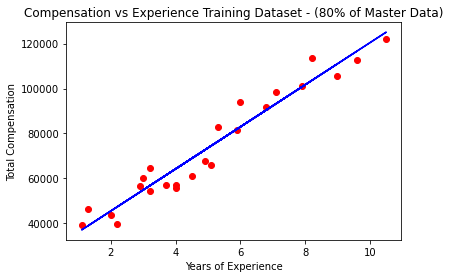

In [93]:

predictions = target_model_2.predict(x_tst)
print('')
pypl.scatter(x_trn, y_trn, color = 'red')
pypl.plot(x_trn, target_model_2.predict(x_trn), color = 'blue')
pypl.title('Compensation vs Experience Training Dataset - (80% of Master Data)')

pypl.xlabel('Years of Experience')
pypl.ylabel('Total Compensation')
pypl.show()
print('')

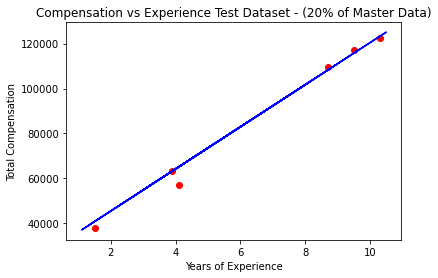

In [94]:
print('')
pypl.scatter(x_tst, y_tst, color = 'red')
pypl.plot(x_trn, target_model_2.predict(x_trn), color = 'blue')
pypl.title('Compensation vs Experience Test Dataset - (20% of Master Data)')
pypl.xlabel('Years of Experience')
pypl.ylabel('Total Compensation')
pypl.show()
print('')

In [95]:
print('Mean Square Error : MSE:          ', metrics.mean_squared_error(y_tst, predictions))
print('Root Mean Square Error : RMSE:    ', np.sqrt(mean_squared_error(y_tst, predictions)))
print('Mean Absolute Error : MAE:        ', metrics.mean_absolute_error(y_tst, predictions))

Mean Square Error : MSE:           13074329.967059242
Root Mean Square Error : RMSE:     3615.8442951901625
Mean Absolute Error : MAE:         2418.3667900508567


Business Context:

Out of the Master Dataset which depicts Compensation against Years of Experience at Linear Relation

Y Intercept value at minimum is 26,777 which is at floor level (or zero) Experience.

Root Mean Square Error (RMSE) shows the error tolerance level of the built ML Model. It is at 3615 (or 3.6%).

The Coefficient is 9360 which depicts year-on-year increase in the Compensation based on the number of Years of Experience.





In [41]:
## END OF SECOND METHOD